In [1]:
from fastai.vision.all import *
from os import path

In [2]:
file_path = '../../data/multi_label/posters/'

poster_df = pd.read_csv("../../data/multi_label/MovieGenre.csv", encoding = "ISO-8859-1")
poster_df = poster_df.drop_duplicates(subset=['imdbId'], keep="last")
poster_df["filename"] = poster_df["imdbId"].astype(str) + ".jpg"
poster_df = poster_df[poster_df["filename"].apply(lambda t: path.exists(file_path + t))]
poster_df = poster_df[poster_df["Genre"].apply(lambda t: isinstance(t, str))]
poster_df.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,filename
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,"https://images-na.ssl-images-amazon.com/images/M/MV5BZTk2ZmUwYmEtNTcwZS00YmMyLWFkYjMtNTRmZDA3YWExMjc2XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UY268_CR10,0,182,268_AL_.jpg",113497.jpg
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMjQxM2YyNjMtZjUxYy00OGYyLTg0MmQtNGE2YzNjYmUyZTY1XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg",113228.jpg
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMTczMTMyMTgyM15BMl5BanBnXkFtZTcwOTc4OTQyMQ@@._V1_UY268_CR4,0,182,268_AL_.jpg",114885.jpg
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BOTEyNzg5NjYtNDU4OS00MWYxLWJhMTItYWU4NTkyNDBmM2Y0XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg",113041.jpg
5,113277,http://www.imdb.com/title/tt113277,Heat (1995),8.2,Action|Crime|Drama,"https://images-na.ssl-images-amazon.com/images/M/MV5BNGMwNzUwNjYtZWM5NS00YzMyLWI4NjAtNjM0ZDBiMzE1YWExXkEyXkFqcGdeQXVyNDk3NzU2MTQ@._V1_UX182_CR0,0,182,268_AL_.jpg",113277.jpg


In [3]:
def get_x(r):
    return file_path + r['filename']

def get_y(r):
    return r['Genre'].split('|')

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x = get_x, 
                   get_y = get_y,
                   item_tfms = RandomResizedCrop(128, min_scale = 0.35),
                   batch_tfms=aug_transforms())

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


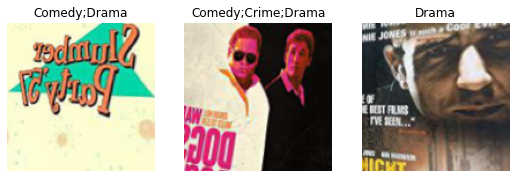

In [4]:
dls = dblock.dataloaders(poster_df)
dls.show_batch(nrows=1, ncols=3)

In [5]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()

model = xresnet50(n_out=dls.c)
learn = Learner(dls, model, metrics=partial(accuracy_multi, thresh=0.4))

SuggestedLRs(lr_min=0.06309573650360108, lr_steep=0.0003981071640737355)

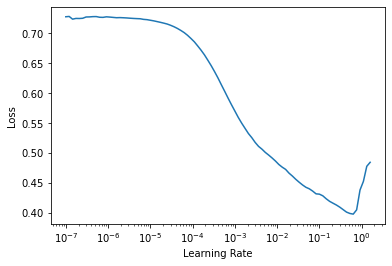

In [6]:
learn.lr_find()

In [7]:
learn.fit_one_cycle(10, 7e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.214466,0.213692,0.923657,50:43
1,0.212420,0.215327,0.921030,51:11
2,0.208941,0.209023,0.923200,55:52
3,0.207801,0.208052,0.924313,51:21
4,0.209288,0.207965,0.925141,54:26
5,0.207127,0.206391,0.925171,51:01
6,0.206310,0.205800,0.925337,47:30
7,0.205775,0.205004,0.925185,46:34
8,0.204510,0.204155,0.925724,46:34
9,0.204309,0.203980,0.925832,46:13


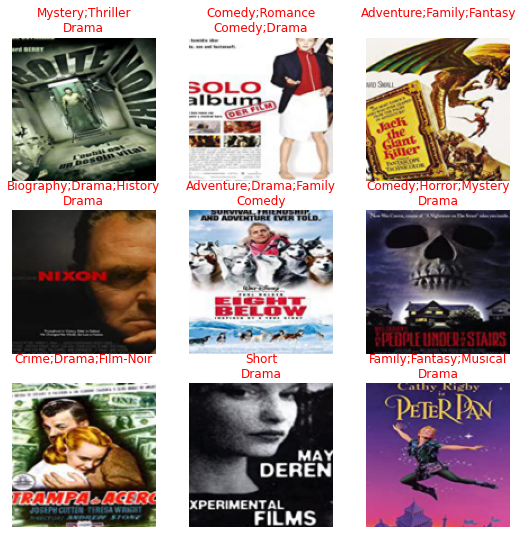

In [8]:
learn.show_results()

In [9]:
learn.export('multi_genres_predictor_fastai.pkl')